# Problem Statement

$X$ contains a year of daily stock prices for a certain company. You know that sometime around the middle of the year, something changed inside the company, possibly affecting the price of the stock.
1. Are the stock prices different before and after the change? Show your answer quantitatively Your answer should work without specifically deciding when the change occurred.
2. If there's a change, is the change making the stock price going up or down? Quantify your answer.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def make_data():
    T = 260
    t0 = 123
    dX = np.random.normal(0, 0.015, T)
    dX[t0:] += np.random.normal(0, 0.05, T - t0)
    dX[t0:] += 1e-2
    return np.exp(2.4 + np.cumsum(dX))

In [17]:
X = make_data()

(0.0, 25.204424513737173)

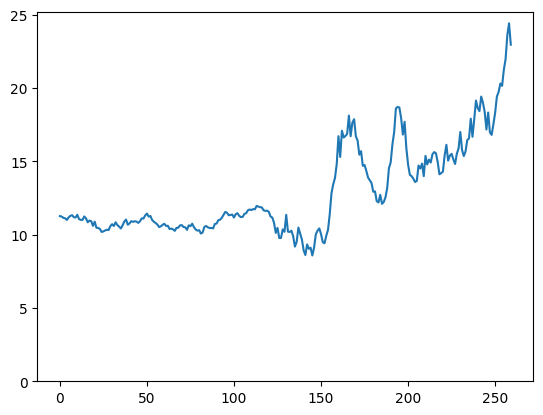

In [18]:
plt.plot(X)
plt.ylim((0, None))

## Answer

* One way to quantify this, without finding the change, is with weighted means and variances. With that, you will answer the first question to show that there was a change.

In [19]:
len(X)

260

In [20]:
len(X)/2

130.0

In [21]:
T = len(X)
w_start = np.zeros(T)
w_start[:T//3] = 1
w_start[T//3:2*(T//3)] = np.linspace(1, 0, T//3)
w_end = 1 - w_start

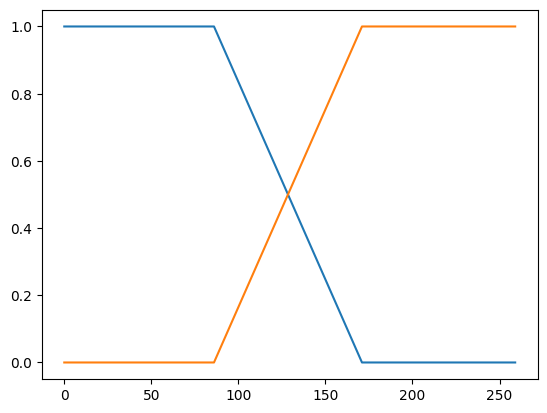

In [22]:
plt.plot(w_start)
plt.plot(w_end)

In [26]:
mean_start = np.sum(w_start * X) / np.sum(w_start)
mean_end = np.sum(w_end * X) / np.sum(w_end)

In [27]:
mean_start, mean_end

(10.841684989623364, 14.898407839393418)

In [28]:
var_start = np.sum(w_start * (X - mean_start)**2) / np.sum(w_start)
var_end = np.sum(w_end * (X - mean_end)**2) / np.sum(w_end)

In [29]:
var_start, var_end

(0.5428198901888289, 10.757562384099701)

The starting and ending parts of the series have substantially different mean and variance. The mean after the change is higher.

To answer the second question, you can measure the change in trend by looking at statistics of the time derivative, $X[i] - X[i-1]$. The histogram below shows that the prices became more volatile after the change, but also perhaps acquired an upward trend.

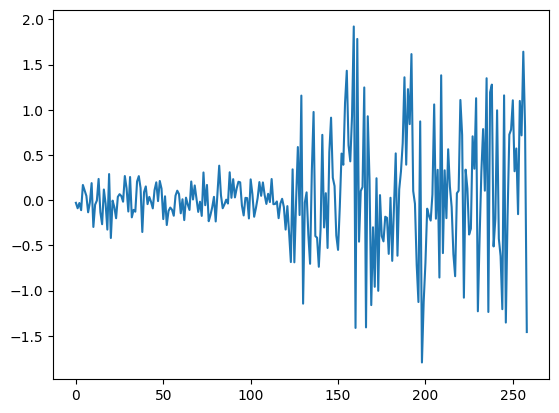

In [33]:
plt.plot(np.diff(X))

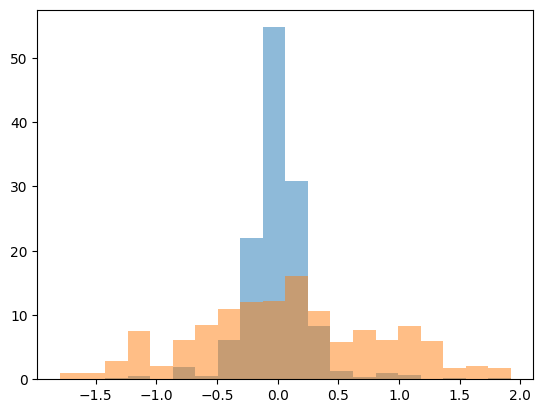

In [34]:
_ = plt.hist(np.diff(X), weights=w_start[:-1], bins=20, alpha=0.5)
_ = plt.hist(np.diff(X), weights=w_end[:-1], bins=20, alpha=0.5)

In order to quantify the volatility and trend the same as before:

In [18]:
dX = np.concatenate(([0], np.diff(X)))
mean_diff_start = np.sum(w_start * dX) / np.sum(w_start)
mean_diff_end = np.sum(w_end * dX) / np.sum(w_end)

In [19]:
mean_diff_start, mean_diff_end

(-0.010857501240569008, 0.014756976118482703)

In [20]:
var_diff_start = np.sum(w_start * (dX - mean_diff_start)**2) / np.sum(w_start)
var_diff_end = np.sum(w_end * (dX - mean_diff_end)**2) / np.sum(w_end)

In [21]:
var_diff_start, var_diff_end

(0.03370823768392421, 0.3501711082665038)

Therefore, the average rate of change in the beginning of the graph is {{var_diff_start}} and the later part of the graph has the rate of change of {{var_diff_end}}